## 基本要求
a) 实现single-linkage层次聚类算法； b) 实现complete-linkage层次聚类算法；

導入需要的包

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
import time

In [2]:
MAX_NUM = 1e3
# method
def singleLinkage(X):
    for i in range (X.shape[1]):
        if(X[0][i] > X[1][i]):
            X[0][i] = X[1][i]
    return X[0]
    
def completeLinkage(X):
    for i in range (X.shape[1]):
        if(X[0][i] < X[1][i]):
            X[0][i] = X[1][i]
    return X[0]

def averageLinkage(datas, clusterDist, setList, dest, src):
    setList = np.array(setList,dtype=object)
    for i in range(setList.shape[0]):
        if(i != dest and i != src):
            tmp = 0
            for j in [dest, src]:
                for g in setList[i]:
                    setList[i] = np.array(setList[i], dtype=object)
                    for t in setList[j]:
                        setList[j] = np.array(setList[j], dtype=object)
                        tmp = tmp + np.sum((datas[g] - datas[t]) ** 2) / (setList[i].shape[0] + setList[j].shape[0])
            clusterDist[i][dest] = clusterDist[dest][i] = tmp
    clusterDist = np.delete(clusterDist, src, axis=0)
    clusterDist = np.delete(clusterDist, src, axis=1)
    return clusterDist

In [3]:
class AgglomerativeClustering:
    def __init__(self):
        # 对每次的合并进行记录
        self.steps = []

    def fit(self, datas, method):
        self.dataCnt = datas.shape[0]
        # 预处理各点之间的距离
        allDist = np.zeros((self.dataCnt, self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i] - datas[j]) ** 2)
        setList, clusterCount = [[i] for i in range(self.dataCnt)], self.dataCnt
        print("calculate distance finish!")

        # 聚类间距离矩阵
        clusterDist = np.zeros((self.dataCnt, self.dataCnt)) + MAX_NUM
        for i in range(clusterCount):
            for j in range(i + 1, clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]
        print("calculate cluster distance finish!")

        while clusterCount != 1:
            # 最相似的两个聚类
            res = np.argmin(clusterDist)
            dest, src = int(res / clusterCount), res % clusterCount
            # steps进行一次记录
            self.steps.append((setList[dest][0], setList[src][0]))
            # 聚类间距离矩阵更新
            modify = method(clusterDist[[dest, src]])
            clusterDist[dest] = modify
            clusterDist[:, dest] = modify
            clusterDist = np.delete(clusterDist, src, axis=0)
            clusterDist = np.delete(clusterDist, src, axis=1)
            clusterDist[dest][dest] = MAX_NUM
            # 聚类更新
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1
            if (self.dataCnt - clusterCount) % (self.dataCnt / 20) == 0:
                print(clusterCount, " clusters left.")

        print("cluster finish !")

    def averagelinkage_fit(self, datas):
        self.dataCnt = datas.shape[0]

        allDist = np.zeros((self.dataCnt, self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i] - datas[j]) ** 2)
        setList, clusterCount = [[i] for i in range(self.dataCnt)], self.dataCnt
        print("calculate distance finish!")

        clusterDist = np.zeros((self.dataCnt, self.dataCnt)) + MAX_NUM
        for i in range(clusterCount):
            for j in range(i + 1, clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]
        print("calculate cluster distance finish!")

        while clusterCount != 1:
            res = np.argmin(clusterDist)
            dest, src = int(res / clusterCount), res % clusterCount
            self.steps.append((setList[dest][0], setList[src][0]))
            clusterDist = averageLinkage(datas, clusterDist, setList, dest, src)
            clusterDist[dest][dest] = MAX_NUM
            # 聚类更新
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1
            if (self.dataCnt - clusterCount) % (self.dataCnt / 20) == 0:
                print(clusterCount, " clusters left.")

    def label(self, k):
        root = list(range(self.dataCnt))

        def find_root(n):
            if root[root[n]] == root[n]:
                return root[n]
            root[n] = find_root(root[n])
            return root[n]

        for i in range(self.dataCnt - k):  # 根据steps记录产生非连通图
            src, dest = self.steps[i]
            root[find_root(dest)] = find_root(src)
        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0
        for i in range(self.dataCnt):  # 将根节点标注为新的cluster
            if i == root[i]:  # i是根
                clusterNum += 1
                cluster[i] = clusterNum
        for i in range(self.dataCnt):  # 将非根节点标注为根节点的cluster
            if i != root[i]:  # i不是根
                cluster[i] = cluster[find_root(i)]
        return cluster

generate data finish!
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
Total cost: 27.973679304122925sec.
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters l

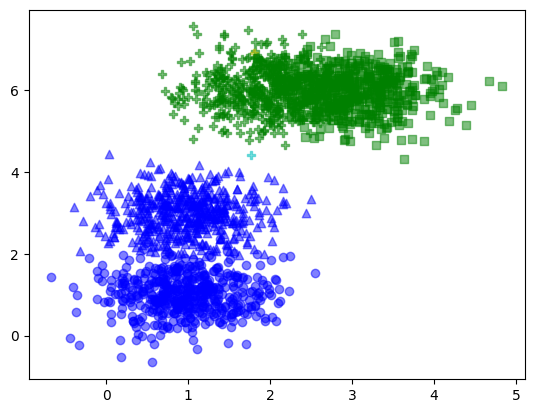

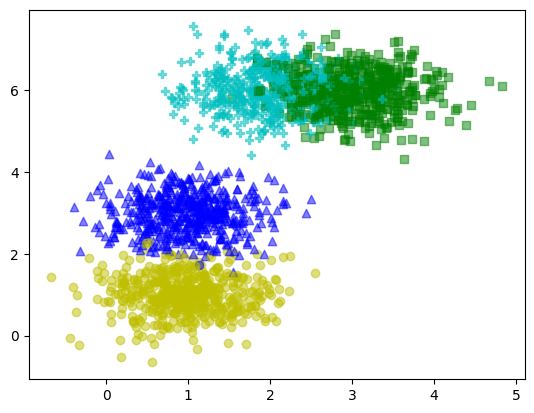

In [4]:
def create_data(centers,num=100,std=0.7):
    '''
    生成用于聚类的数据集
    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X,labels_true

def plot_data(*data):
    '''
    绘制用于聚类的数据集
    :param data: 可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记，第三个元素为预测分类标记
    :return: None
    '''
    X,labels_true,labels_predict,cnt=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    markers='o^sP*DX'
    for i in range(len(labels_true)):
        predict=labels_predict[i]
        ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
        color=colors[predict%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)

centers=[[1,1,1],[1,3,3],[3,6,5],[2,6,8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X,labels_true= create_data(centers,2000,0.5) # 产生用于聚类的数据集，聚类中心点的个数代表类别数
print("generate data finish!")

METHOD_APPLY = [singleLinkage,completeLinkage]
# ,averageLinkage
cnt=0
for method in METHOD_APPLY:
    start = time.time()
    model = AgglomerativeClustering()
    model.fit(X,method)
    k=4
    plot_data(X,labels_true,model.label(k),cnt)
    cnt+=1
    print("Total cost: " + str(time.time() - start) + "sec.")
    print("-------Segmentation-------")

## 中級要求
a) 实现average-linkage层次聚类算法； b) 将上述三种算法的性能进行简要对比；

calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
Total cost: 272.69287943840027sec.
-------Segmentation-------


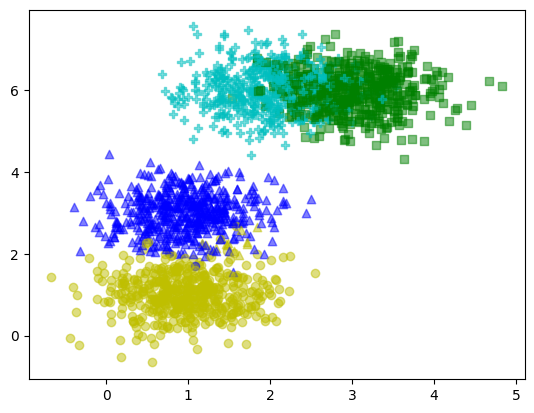

In [5]:
start = time.time()
model = AgglomerativeClustering()
model.averagelinkage_fit(X)
k=4
plot_data(X,labels_true,model.label(k),cnt)
cnt+=1
print("Total cost: " + str(time.time() - start) + "sec.")
print("-------Segmentation-------")

前两个方法只是简单的比较最短与最长路径，因此计算时间较短性能也较高  
第三个随著聚集起来的类越来越多，计算类间所有点的全部距离时间开销也就随之大幅增加，性能远不及前两著。

## 高級要求
通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析；

generate data finish!
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
Total cost: 27.093629360198975sec.
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters l

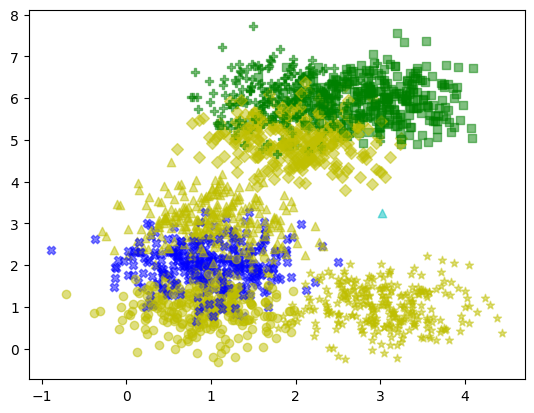

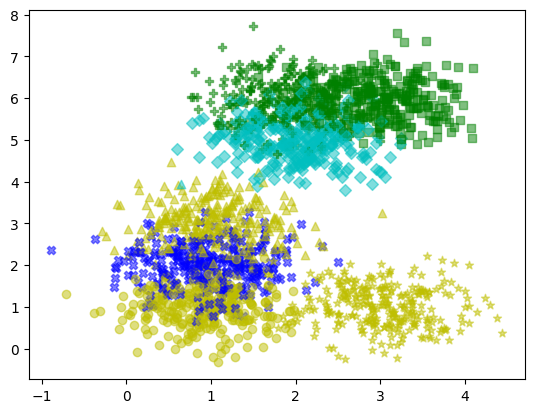

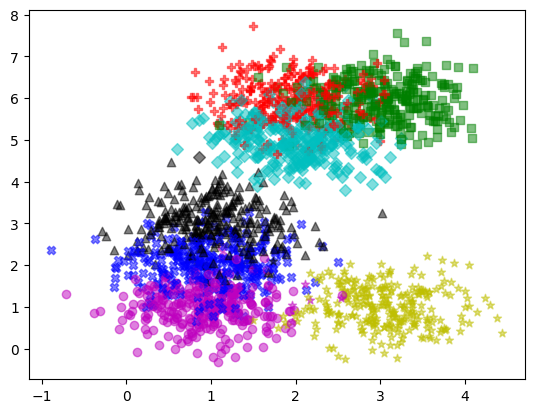

In [6]:
centers=[[1,1,1],[1,3,3],[3,6,5],[2,6,8], [3,1,3], [2,5,1], [1,2,7]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X,labels_true= create_data(centers,2000,0.5) # 产生用于聚类的数据集，聚类中心点的个数代表类别数
print("generate data finish!")

METHOD_APPLY = [singleLinkage,completeLinkage]
# ,averageLinkage
cnt=0
for method in METHOD_APPLY:
    start = time.time()
    model = AgglomerativeClustering()
    model.fit(X,method)
    k=4
    plot_data(X,labels_true,model.label(k),cnt)
    cnt+=1
    print("Total cost: " + str(time.time() - start) + "sec.")
    print("-------Segmentation-------")

start = time.time()
model = AgglomerativeClustering()
model.averagelinkage_fit(X)
k=4
plot_data(X,labels_true,model.label(k),cnt)
cnt+=1
print("Total cost: " + str(time.time() - start) + "sec.")
print("-------Segmentation-------")

结果可以清晰地看到，使用singleLinkage,completeLinkage虽然速度非常快，但当聚类中心较靠近时难以精确的分辨其异同；使用averagelinkage虽然时间成本成倍数增长，但是当聚类中心相距较近时，依然可以较明确的分辨其差异。因此当对时间要求较高，而不需要十分精准的分辨时，可使用singleLinkage,completeLinkage；而不惜时间成本也需要高精确度时则使用averagelinkage。